# Iris-Flowers-Classification
#### Presented by:- Tanisha Verma

In [1]:
#removing unnecessary warning
import warnings
warnings.filterwarnings('ignore')
#importing required librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import andrews_curves
import missingno as msno

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

In [2]:
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/Dell/BHARAT INTERN/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.shape

(150, 6)

In [7]:
df.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

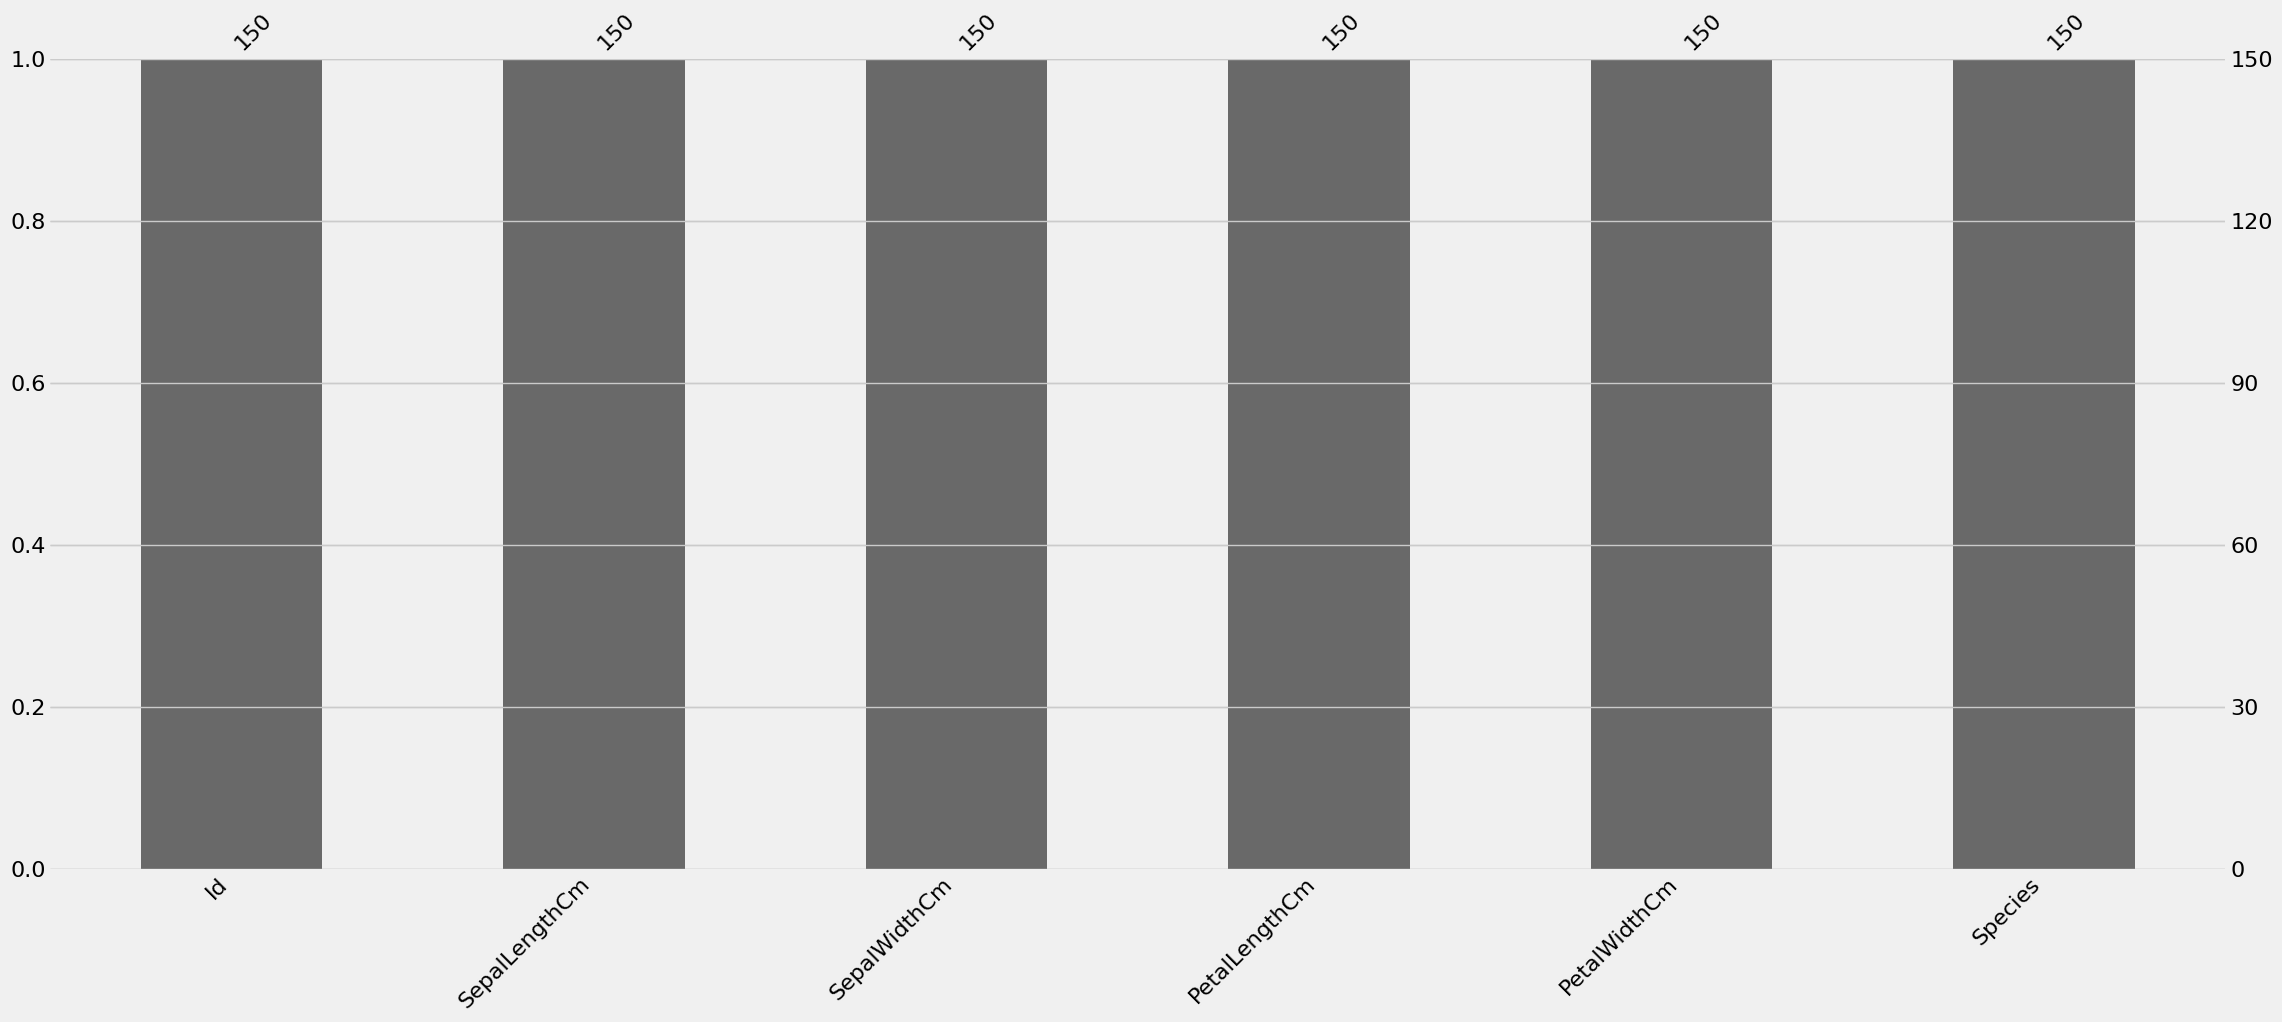

In [10]:
msno.bar(df)

In [11]:
df.drop_duplicates(inplace=True)

### 1. Relationship between species and Sepal length

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

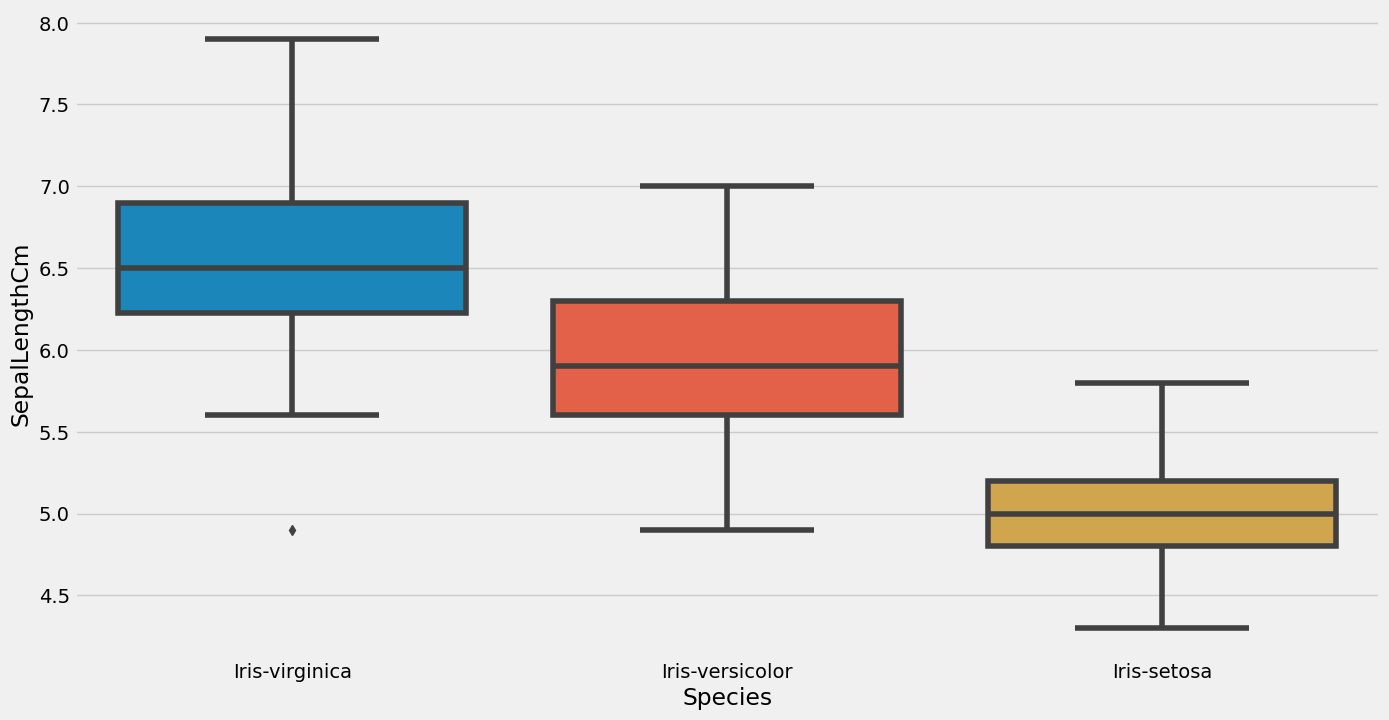

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species', y='SepalLengthCm', data=df.sort_values('SepalLengthCm', ascending=False))

### 2. Relationship between species and sepal width

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

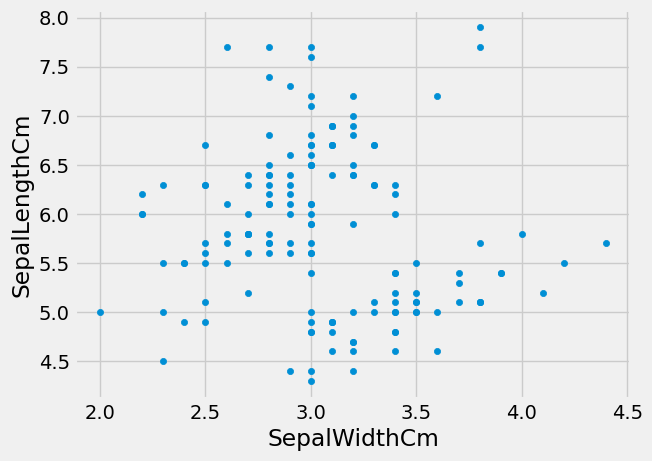

In [13]:
df.plot(kind='scatter',x='SepalWidthCm', y='SepalLengthCm')

### 3. Relationship between sepal width and sepal length

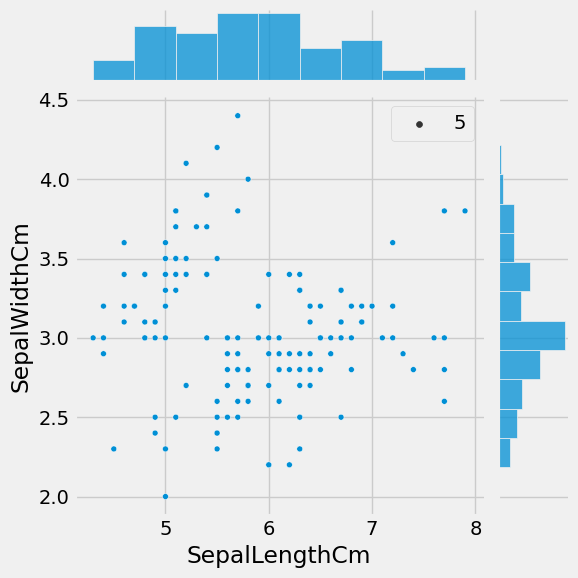

In [14]:
sns.jointplot(x="SepalLengthCm",y="SepalWidthCm", data=df, size=5)

### 4. Pairplot

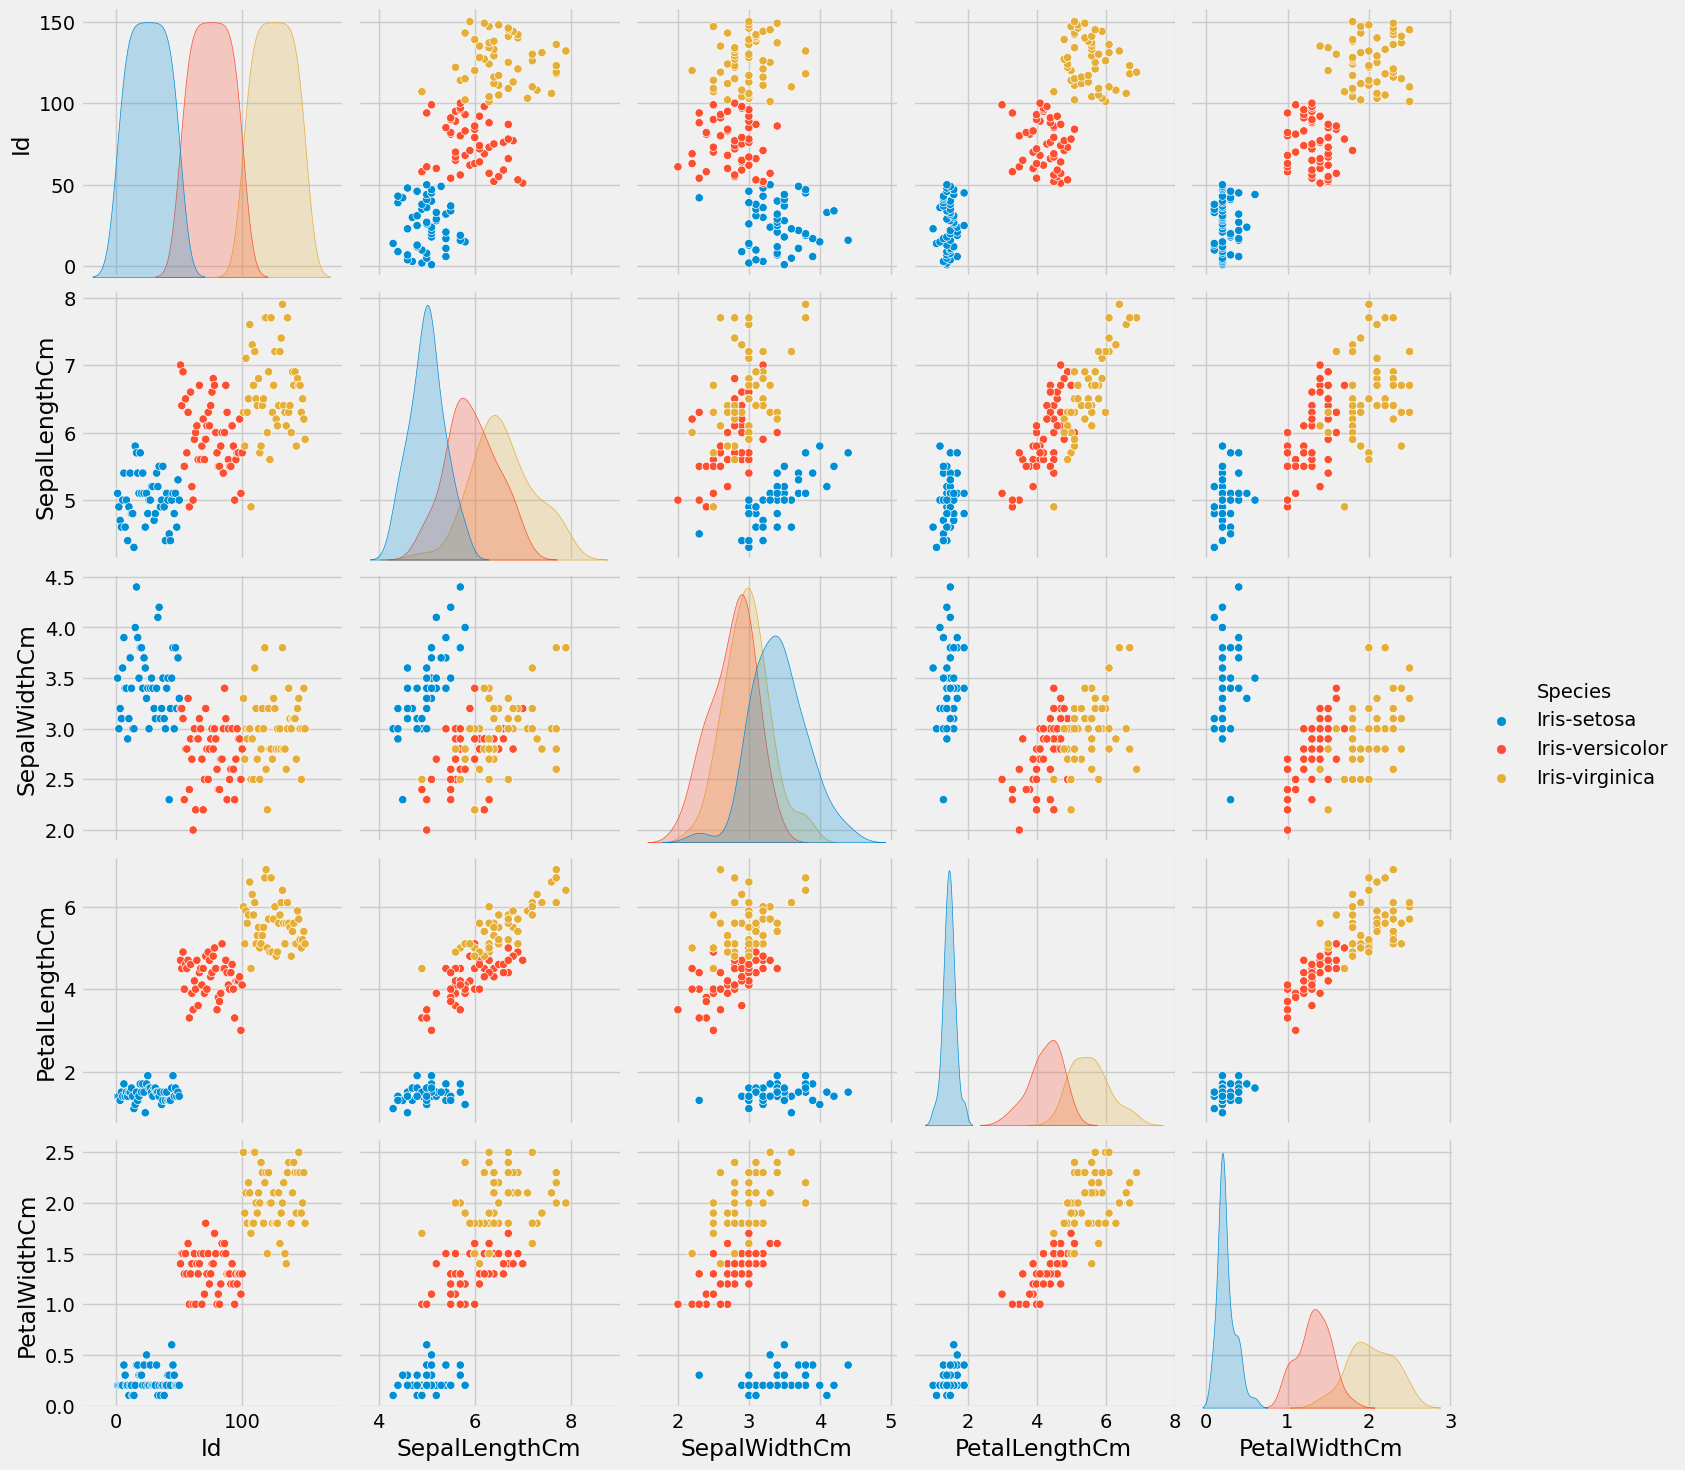

In [15]:
sns.pairplot(df, hue="Species", size=3)

### 5. BoxPlot

array([[<Axes: title={'center': 'Id'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>,
        <Axes: >]], dtype=object)

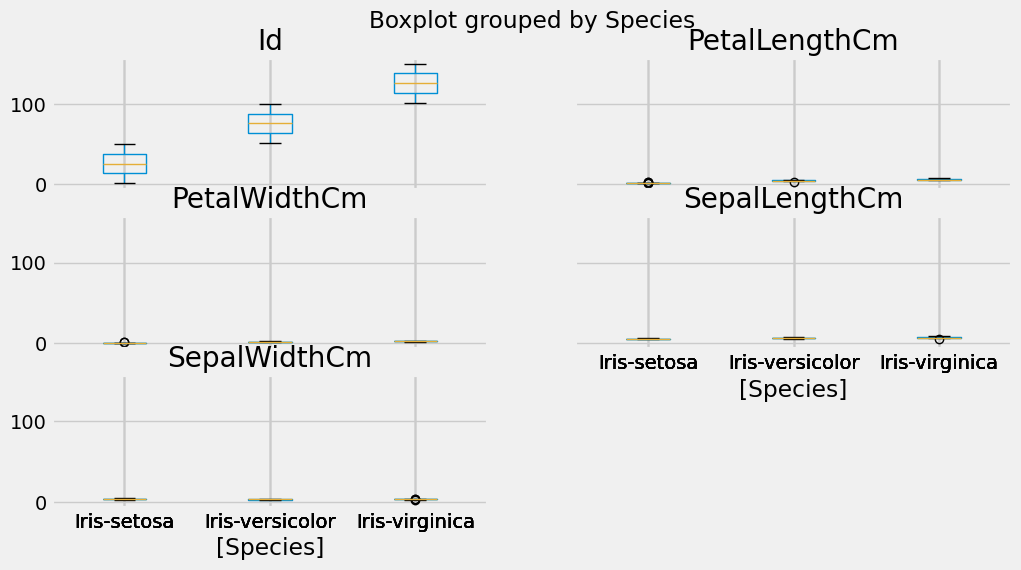

In [16]:
df.boxplot(by="Species",figsize=(12,6))

### 5. Andrews_Curves

<Axes: >

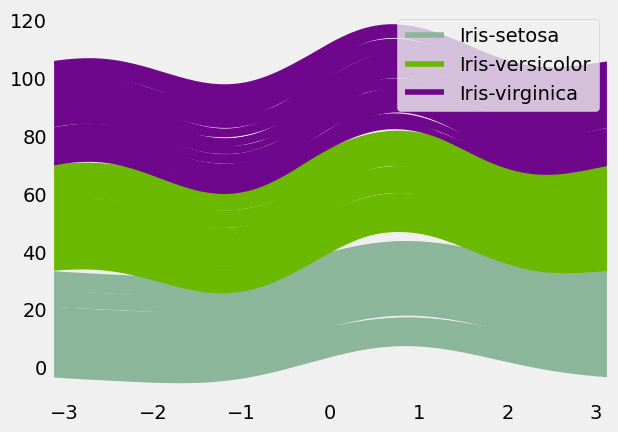

In [17]:
andrews_curves(df,"Species")

### 6. CategoricalPlot

<Figure size 1500x1500 with 0 Axes>

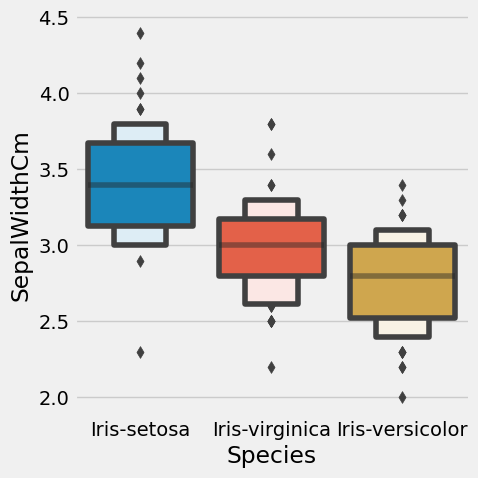

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

### 7. Violinplot

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

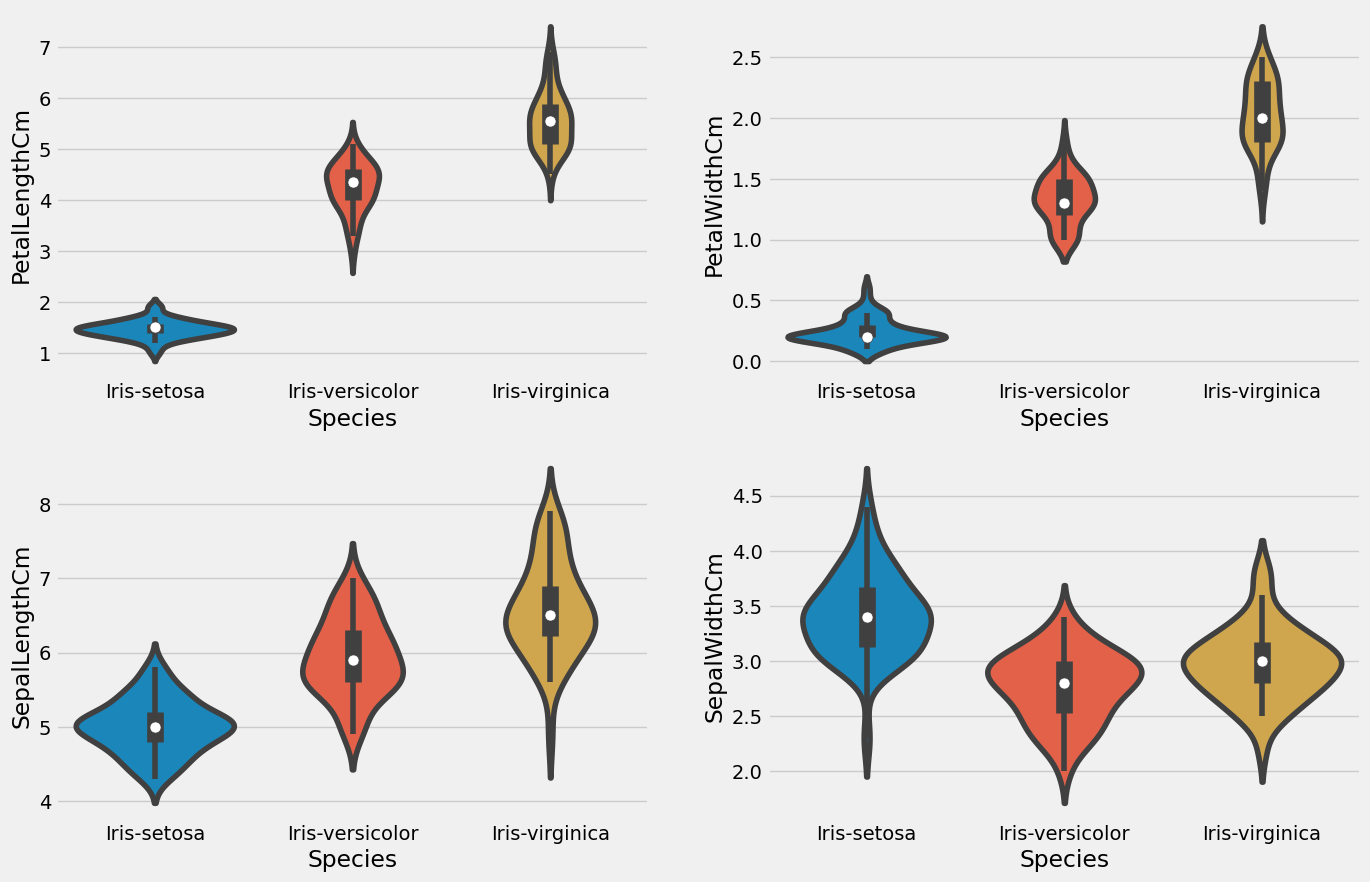

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

## Neural Networks

In [20]:
x=df.drop('Species',axis=1)
y=df['Species']

In [21]:
df['Species']=pd.Categorical(df.Species)
df['Species']=df.Species.cat.codes
y=to_categorical(df.Species)

In [49]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.30,stratify=y,random_state=123)

In [53]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(5,)))
model.add(Dense(3,activation='softmax'))

In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
history = model.fit(X_train, Y_train, epochs=45, validation_data=(X_test, Y_test))

Epoch 1/45
4/4 [==============================] - 2s 158ms/step - loss: 16.9367 - accuracy: 0.4381 - val_loss: 14.2245 - val_accuracy: 0.5556
Epoch 2/45
4/4 [==============================] - 0s 30ms/step - loss: 12.7166 - accuracy: 0.5333 - val_loss: 11.0744 - val_accuracy: 0.3333
Epoch 3/45
4/4 [==============================] - 0s 32ms/step - loss: 9.9850 - accuracy: 0.3333 - val_loss: 7.9018 - val_accuracy: 0.3556
Epoch 4/45
4/4 [==============================] - 0s 30ms/step - loss: 6.7067 - accuracy: 0.4190 - val_loss: 4.9740 - val_accuracy: 0.5778
Epoch 5/45
4/4 [==============================] - 0s 31ms/step - loss: 3.9450 - accuracy: 0.6000 - val_loss: 1.9855 - val_accuracy: 0.6222
Epoch 6/45
4/4 [==============================] - 0s 31ms/step - loss: 1.2176 - accuracy: 0.5524 - val_loss: 1.3573 - val_accuracy: 0.4889
Epoch 7/45
4/4 [==============================] - 0s 28ms/step - loss: 1.7847 - accuracy: 0.4476 - val_loss: 2.2175 - val_accuracy: 0.4444
Epoch 8/45
4/4 [======

In [56]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.3101 - accuracy: 0.9111


[0.3100915551185608, 0.9111111164093018]

In [57]:
pred=model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 127ms/step
[[4.94178496e-02 7.68380821e-01 1.82201326e-01]
 [9.14054096e-01 7.71592557e-02 8.78658332e-03]
 [1.62228886e-02 5.21799326e-01 4.61977750e-01]
 [2.51450613e-02 6.84896827e-01 2.89958149e-01]
 [9.82538044e-01 1.59113407e-02 1.55061344e-03]
 [1.98281626e-03 6.30730212e-01 3.67286950e-01]
 [5.68870746e-05 1.16239905e-01 8.83703172e-01]
 [6.46079853e-02 7.40842342e-01 1.94549635e-01]
 [4.61637415e-03 6.31184578e-01 3.64199013e-01]
 [1.08796557e-04 1.84291527e-01 8.15599680e-01]]


In [58]:
p=np.argmax(pred,axis=1)
print(p)
print(Y_test[:10])

[1 0 1 1 0 1 2 1 1 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [59]:
history.history['accuracy']

[0.43809524178504944,
 0.5333333611488342,
 0.3333333432674408,
 0.41904762387275696,
 0.6000000238418579,
 0.5523809790611267,
 0.4476190507411957,
 0.4285714328289032,
 0.4476190507411957,
 0.4285714328289032,
 0.5523809790611267,
 0.5714285969734192,
 0.6000000238418579,
 0.6190476417541504,
 0.6571428775787354,
 0.5904762148857117,
 0.6095238327980042,
 0.6190476417541504,
 0.6952381134033203,
 0.7047619223594666,
 0.7047619223594666,
 0.6857143044471741,
 0.6857143044471741,
 0.6761904954910278,
 0.761904776096344,
 0.7809523940086365,
 0.7714285850524902,
 0.7714285850524902,
 0.7809523940086365,
 0.7904762029647827,
 0.8285714387893677,
 0.8095238208770752,
 0.8095238208770752,
 0.7904762029647827,
 0.8095238208770752,
 0.800000011920929,
 0.800000011920929,
 0.8476190567016602,
 0.8476190567016602,
 0.8380952477455139,
 0.8190476298332214,
 0.8380952477455139,
 0.8380952477455139,
 0.8285714387893677,
 0.8476190567016602]

In [60]:
history.history['val_accuracy']

[0.5555555820465088,
 0.3333333432674408,
 0.35555556416511536,
 0.5777778029441833,
 0.6222222447395325,
 0.4888888895511627,
 0.4444444477558136,
 0.4444444477558136,
 0.4888888895511627,
 0.5555555820465088,
 0.5777778029441833,
 0.5777778029441833,
 0.644444465637207,
 0.6666666865348816,
 0.6222222447395325,
 0.7111111283302307,
 0.644444465637207,
 0.6666666865348816,
 0.8222222328186035,
 0.8444444537162781,
 0.8444444537162781,
 0.8444444537162781,
 0.7111111283302307,
 0.8888888955116272,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8888888955116272,
 0.8888888955116272,
 0.8666666746139526,
 0.9333333373069763,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272,
 0.8666666746139526,
 0.8888888955116272,
 0.8888888955116272,
 0.9111111164093018,
 0.8888888955116272,
 0.9111111164093018,
 0.8666666746139526,
 0.8888888955116272,
 0.9111111164093018]

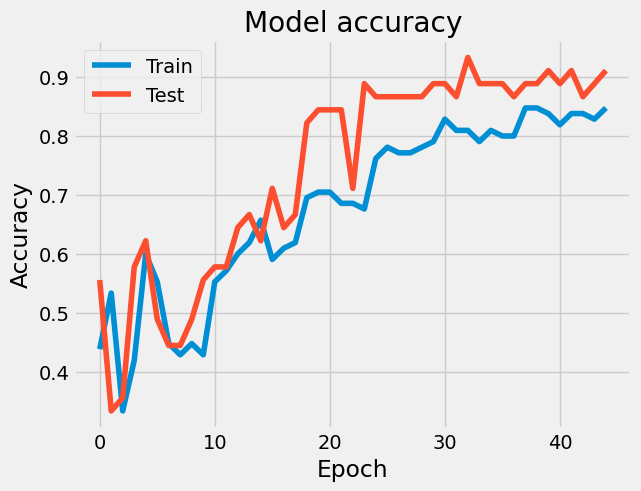

In [61]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()